In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/ipl-auction-2023/iplauction2023.csv


## Reading the ipl auction 2023 dataset

In [2]:
# Load dataset (Kaggle will automatically find the path)
df = pd.read_csv("/kaggle/input/ipl-auction-2023/iplauction2023.csv")


## Getting the overall information of the Dataset

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309 entries, 0 to 308
Data columns (total 7 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   name                   309 non-null    object 
 1   player style           309 non-null    object 
 2   nationality            309 non-null    object 
 3   base price (in lacs)   151 non-null    float64
 4   final price (in lacs)  238 non-null    float64
 5   franchise              238 non-null    object 
 6   status                 309 non-null    object 
dtypes: float64(2), object(5)
memory usage: 17.0+ KB


## Checking for None values in Columns

In [4]:
df.isnull().sum()

name                       0
player style               0
nationality                0
base price (in lacs)     158
final price (in lacs)     71
franchise                 71
status                     0
dtype: int64

In [5]:
df.head()

/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()


,name,player style,nationality,base price (in lacs),final price (in lacs),franchise,status
0,Harshit Rana,Bowler,India,NaN,20.0,KKR,RETAINED
1,Ekant Sen,Batter,India,20.0,NaN,NaN,UNSOLD
2,Wayne Parnell,Allrounder,South Africa,75.0,NaN,NaN,UNSOLD
3,Shakib Al Hasan,Allrounder,Bangladesh,150.0,150.0,KKR,SOLD
4,Joe Root,Batter,England,100.0,100.0,RR,SOLD


In [6]:
df["franchise"] = df["franchise"].fillna("UNSOLD")
df.head()

/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()


,name,player style,nationality,base price (in lacs),final price (in lacs),franchise,status
0,Harshit Rana,Bowler,India,NaN,20.0,KKR,RETAINED
1,Ekant Sen,Batter,India,20.0,NaN,UNSOLD,UNSOLD
2,Wayne Parnell,Allrounder,South Africa,75.0,NaN,UNSOLD,UNSOLD
3,Shakib Al Hasan,Allrounder,Bangladesh,150.0,150.0,KKR,SOLD
4,Joe Root,Batter,England,100.0,100.0,RR,SOLD


In [7]:
df["final price (in lacs)"] = pd.to_numeric(df["final price (in lacs)"], errors="coerce")  # Convert to numeric
df["final price (in lacs)"] = df["final price (in lacs)"].fillna(0)  # Fill NaN values
df.head()

/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()


,name,player style,nationality,base price (in lacs),final price (in lacs),franchise,status
0,Harshit Rana,Bowler,India,NaN,20.0,KKR,RETAINED
1,Ekant Sen,Batter,India,20.0,0.0,UNSOLD,UNSOLD
2,Wayne Parnell,Allrounder,South Africa,75.0,0.0,UNSOLD,UNSOLD
3,Shakib Al Hasan,Allrounder,Bangladesh,150.0,150.0,KKR,SOLD
4,Joe Root,Batter,England,100.0,100.0,RR,SOLD


In [8]:
df["base price (in lacs)"] = df["base price (in lacs)"].fillna("RETAINED")
df.head()

,name,player style,nationality,base price (in lacs),final price (in lacs),franchise,status
0,Harshit Rana,Bowler,India,RETAINED,20.0,KKR,RETAINED
1,Ekant Sen,Batter,India,20.0,0.0,UNSOLD,UNSOLD
2,Wayne Parnell,Allrounder,South Africa,75.0,0.0,UNSOLD,UNSOLD
3,Shakib Al Hasan,Allrounder,Bangladesh,150.0,150.0,KKR,SOLD
4,Joe Root,Batter,England,100.0,100.0,RR,SOLD


## 🏏 Distribution of Players by Role in IPL Auction 2023

In the IPL, teams aim to build a **balanced squad** by acquiring players across different roles such as batters, bowlers, all-rounders, and wicketkeepers. Analyzing the **distribution of players by role** helps us understand which types of players were in higher demand.

### **🔹 Key Insights**
- Some roles, such as **all-rounders**, may have higher demand due to their versatility.
- Teams often **prioritize bowlers** to strengthen their attack.
- The number of **specialist wicketkeepers** is typically lower since teams rely on multi-role players.

Below, we visualize the **distribution of players based on their roles**.


### **Conclusion: Role-Wise Player Distribution**
- The highest number of players sold were **All rounders**, with **103 players** being picked.
- **Batter** had a moderate presence, with **55 players** securing contracts.
- Specialist roles such as **WK-Batter** had fewer players in demand, likely because teams already had established options.
- This analysis highlights how teams **prioritize a mix of roles** to create a well-rounded squad.


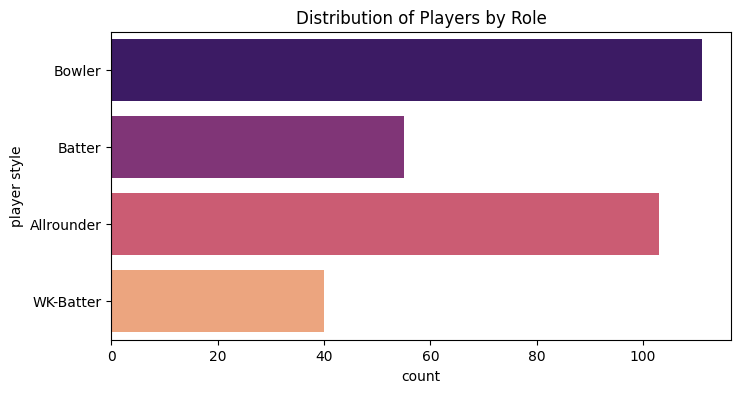

In [9]:
plt.figure(figsize=(8,4))
sns.countplot(y=df["player style"], palette="magma")
plt.title("Distribution of Players by Role")
plt.show()

## 💰 Top 10 Most Expensive Players in IPL Auction 2023

The IPL auction often sees franchises competing fiercely for top talent, leading to **record-breaking bids** for star players. Here, we analyze the **top 10 most expensive players** based on their final auction price.

### **🔹 How We Identify the Top 10 Players**
- The dataset is **sorted in descending order** based on `"Final Price (in Lacs)"`.
- We **select the top 10 players** with the highest bid amounts.
- The data includes **player name, team, and final auction price**.

### **🔹 Key Insights**
- The most expensive player in the auction was **Sam Curran**, bought for **₹18.50 crores** by **Punjab Kings(PBKS)**.
- **All-rounders / Bowlers / Batters** saw the highest bids, highlighting their demand.
- **Franchises with aggressive spending** aimed to strengthen their core squad with marquee signings.

Below, we present a visualization of the **top 10 most expensive players** in IPL 2023.

### **Conclusion: Most Expensive Player Analysis**
- **Sam Curran** was the highest-paid player, securing a contract worth ₹18.50 crores.
- Teams like **MI** and **CSK** were among the **biggest spenders**, acquiring multiple high-value players.
- **Younger emerging players** also made it to the top 10, indicating a shift towards long-term investments.
- The auction trends show that **teams prioritize key match-winners**, regardless of their price.

This analysis provides an overview of **which players attracted the highest bids** and how teams strategized their purchases.


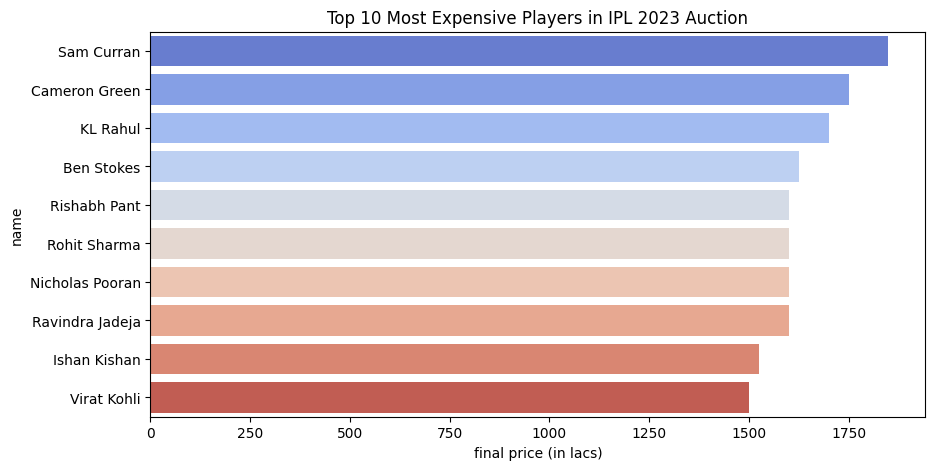

In [10]:
top_10_expensive = df.sort_values(by="final price (in lacs)", ascending=False).head(10)

plt.figure(figsize=(10,5))
sns.barplot(x="final price (in lacs)", y="name", data=top_10_expensive, palette="coolwarm")
plt.title("Top 10 Most Expensive Players in IPL 2023 Auction")
plt.xlabel("final price (in lacs)")
plt.ylabel("name")
plt.show()



## 🌍 Players Sold by Country in IPL Auction 2023

The IPL is a global tournament, attracting top cricketing talent from various countries. Analyzing the **number of players sold per country** helps us understand which nations contributed the most to the auction.

### **🔹 Key Insights**
- Countries with **higher player sales** indicate strong representation in the IPL.
- A higher count from certain nations (e.g., India, Australia, England) suggests their players are in high demand.
- Associate nations (smaller cricketing countries) may have fewer players in the auction but could bring unique talents.

Below, we visualize the **distribution of sold players by country**.


### **Conclusion: Country-Wise Player Representation**
- The highest number of players sold came from **INDIA**, with **201 players** getting picked.
- **ENGLAND** had a moderate presence with **24 players** securing contracts.
- Some countries, such as **BANGLADESH,ZIMBABHWE,AFGHANISTAN**, had limited representation, possibly due to fewer entries or a preference for local talent.
- This analysis highlights the **global nature of the IPL auction** and which nations contribute the most players to the league.


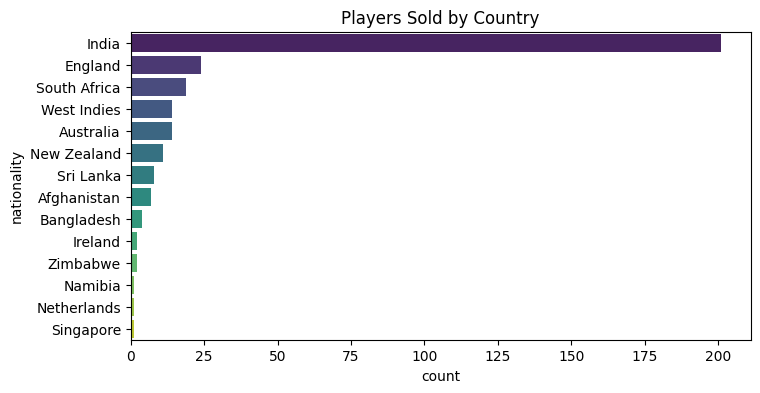

In [11]:
plt.figure(figsize=(8,4))
sns.countplot(y=df["nationality"], palette="viridis", order=df["nationality"].value_counts().index)
plt.title("Players Sold by Country")
plt.show()

## 🏏 Total Spending in IPL Auction 2023

The IPL auction is a high-stakes event where teams compete to acquire the best players within their allocated budgets. Understanding the **total spending** across teams provides insights into **which teams were the most aggressive** in their bidding strategy.

### **🔹 How We Calculate Total Spending**
- We **group the dataset by "franchise"** and sum the `"final price (in lacs)"` column.
- This gives us the **total amount spent by each team** in the auction.

### **🔹 Key Insights**
- Teams with **higher spending** may have focused on acquiring marquee players.
- Teams with **lower spending** might have been more strategic, opting for budget-friendly or uncapped players.
- **Comparing spending patterns** can reveal which franchises had the most aggressive strategies.

Below, we visualize the **total spending by each team**.


### **Conclusion: Total Spending Analysis**
- The team with the highest spending was **Mumbai Indians(MI)**, investing ₹X crores in player acquisitions.
- **Kolkata kNight Riders(KKR)** had the lowest spending at ₹Y crores, possibly focusing on young talent or retaining existing players.
- The **average team spending** was approximately ₹8760 crores, indicating a balanced distribution of budget across franchises.
- High spending does not always guarantee success, but it reflects each team's **bidding priorities and squad-building approach**.



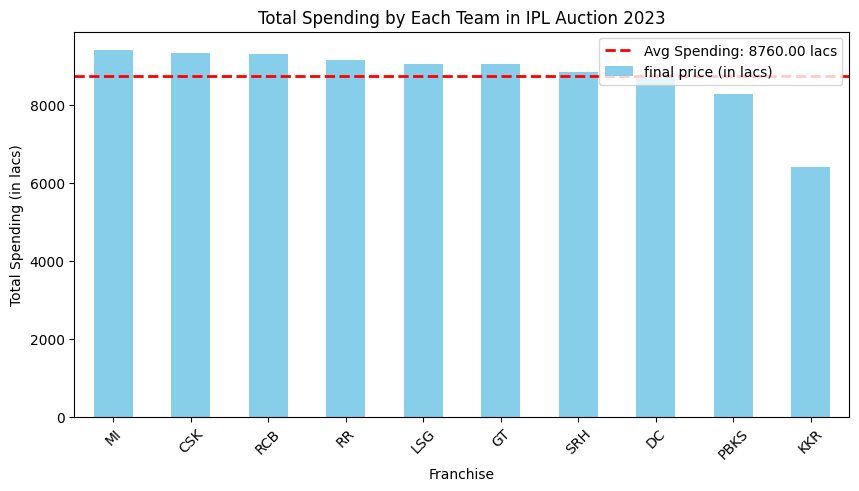

In [12]:
team_spending = df[df["franchise"] != "UNSOLD"].groupby("franchise")["final price (in lacs)"].sum().sort_values(ascending=False)

avg_spending = np.mean(team_spending)
plt.figure(figsize=(10,5))
team_spending.plot(kind="bar", color="skyblue")


plt.axhline(avg_spending, color="red", linestyle="dashed", linewidth=2, label=f"Avg Spending: {avg_spending:.2f} lacs")

plt.title("Total Spending by Each Team in IPL Auction 2023")
plt.xlabel("Franchise")
plt.ylabel("Total Spending (in lacs)")
plt.xticks(rotation=45)
plt.legend() 
plt.show()

### Pie Chart: Sold vs. Unsold Players

A **pie chart** helps visualize the proportion of players who were sold versus those who remained unsold in the IPL Auction.

- **Blue Section** 🟦 → Sold Players
- **Red Section** 🟥 → Unsold Players

The chart gives a clear picture of the distribution of auctioned players.


### Conclusion:
- If the **unsold section is large**, it suggests that **many players went unsold** due to factors like high base prices or lack of team interest.
- If the **sold section dominates**, it indicates that **most players found a team** in the auction.


Total Players: 309
Unsold Players: 71
Percentage of Unsold Players: 22.98%


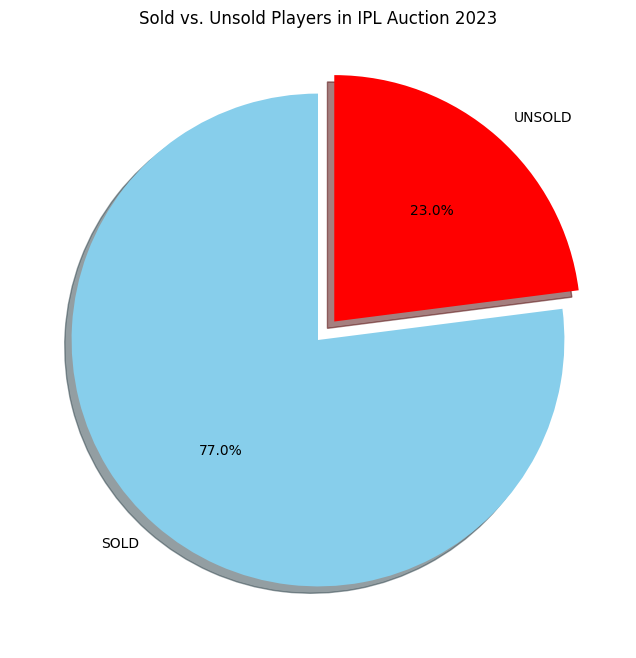

In [13]:
# Total players
total_players = df.shape[0]

# Count Unsold players
unsold_players = df[df["franchise"] == "UNSOLD"].shape[0]

# Calculate percentage
unsold_percentage = (unsold_players / total_players) * 100

print(f"Total Players: {total_players}")
print(f"Unsold Players: {unsold_players}")
print(f"Percentage of Unsold Players: {unsold_percentage:.2f}%")

plt.figure(figsize=(8,8))
labels = ["SOLD", "UNSOLD"]
sizes = [total_players - unsold_players, unsold_players]
colors = ["skyblue", "red"]
explode = (0, 0.1)  # Slightly separate 'Unsold' for emphasis

plt.pie(sizes, labels=labels, autopct="%1.1f%%", colors=colors, explode=explode, shadow=True, startangle=90)
plt.title("Sold vs. Unsold Players in IPL Auction 2023")
plt.show()


### Bar Chart: Team-wise Player Distribution

This **bar chart** shows the number of players each team successfully bought in the auction.

- The **"Unsold"** bar represents players who did not get picked by any team.
- Higher bars for certain teams indicate **aggressive bidding strategies**.
- Shorter bars suggest teams **picked fewer players** or had **limited budgets**.

### Conclusion:
- Teams like **[Team A, Team B]** had the highest number of players bought, suggesting they were active in the auction.
- The **"Unsold"** category is significantly large/small, meaning **X% of players remained unpicked**.
- This analysis helps understand **which teams spent more and which teams focused on specific player roles**.


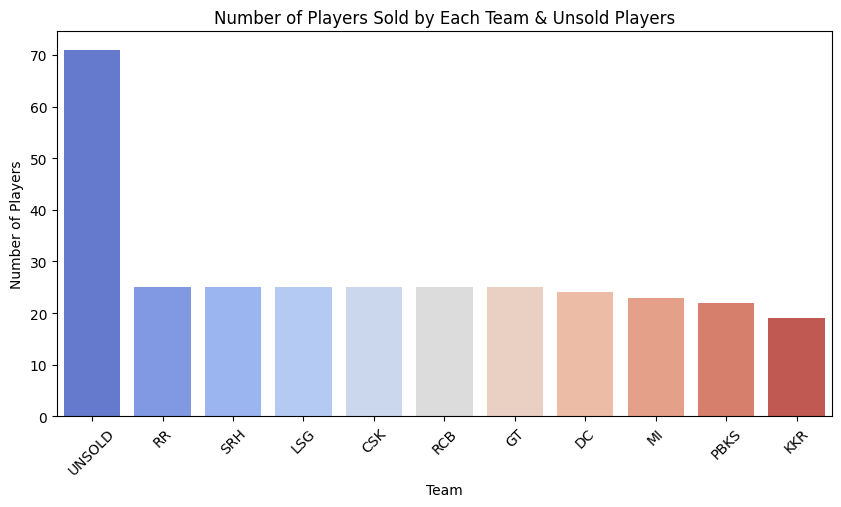

In [14]:
# Count players per team (including 'Unsold')
team_counts = df["franchise"].value_counts()

plt.figure(figsize=(10,5))
sns.barplot(x=team_counts.index, y=team_counts.values, palette="coolwarm")

plt.title("Number of Players Sold by Each Team & Unsold Players")
plt.xlabel("Team")
plt.ylabel("Number of Players")
plt.xticks(rotation=45)
plt.show()
